In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("ecommerce_dataset_updated.csv")

In [27]:
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [31]:
# Dataset Overview
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

# Display Column Names
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB
None

Missing Values:
User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

Basic Statistics:
       Price (Rs.)  Discount (%)  Final_Price(Rs.)
count  3660.000000   3660.000000       3660.000000
mean    254.80

C:\Users\Dell\AppData\Local\Temp\ipykernel_4352\2853118982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='viridis', order=df['Category'].value_counts().index)


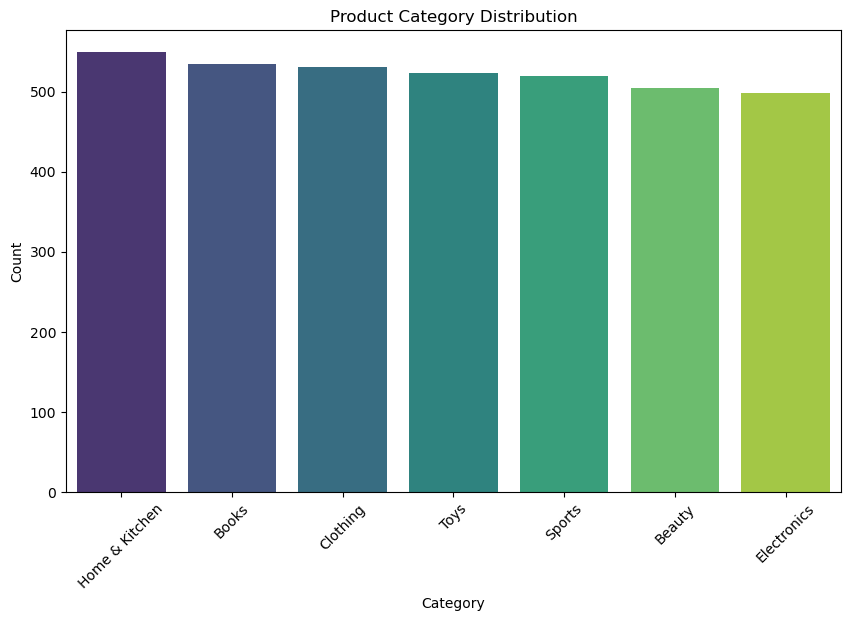

C:\Users\Dell\AppData\Local\Temp\ipykernel_4352\2853118982.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_Method', palette='pastel', order=df['Payment_Method'].value_counts().index)


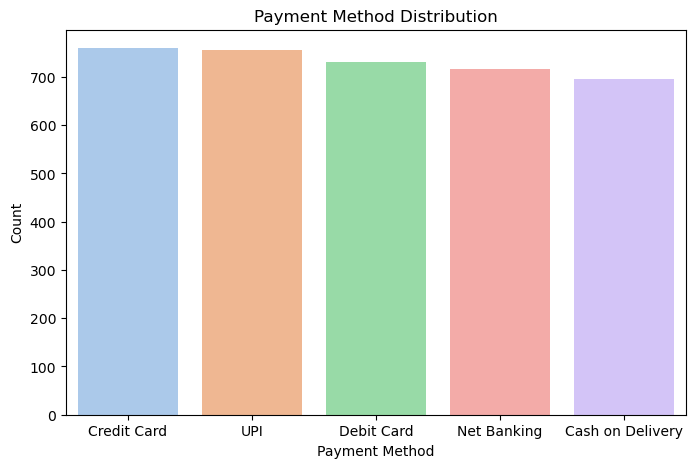

In [33]:
# 1. Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', palette='viridis', order=df['Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Payment Method Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Payment_Method', palette='pastel', order=df['Payment_Method'].value_counts().index)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

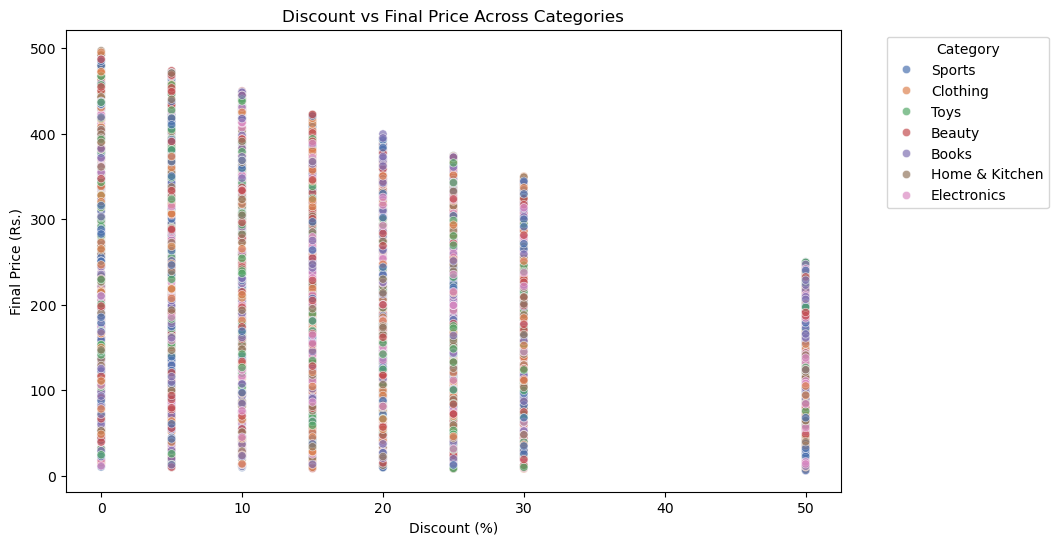

In [35]:
# Scatter Plot: Discount vs Final Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount (%)', y='Final_Price(Rs.)', hue='Category', palette='deep', alpha=0.7)
plt.title('Discount vs Final Price Across Categories')
plt.xlabel('Discount (%)')
plt.ylabel('Final Price (Rs.)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

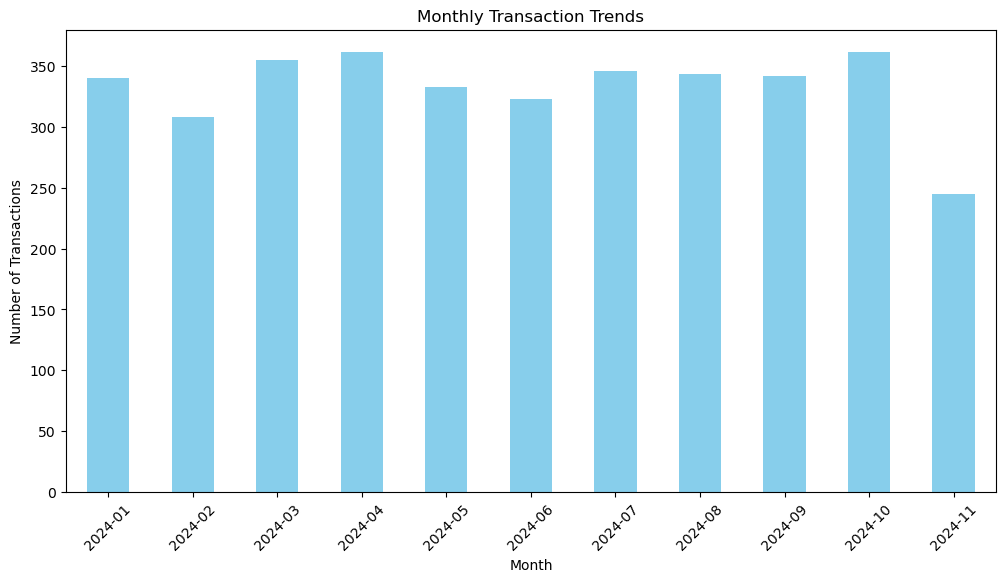

In [37]:
# Time-Based Analysis: Monthly Transaction Trends
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d-%m-%Y')  # Correct format: day-month-year
df['Month'] = df['Purchase_Date'].dt.to_period('M')

monthly_sales = df.groupby('Month').size()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


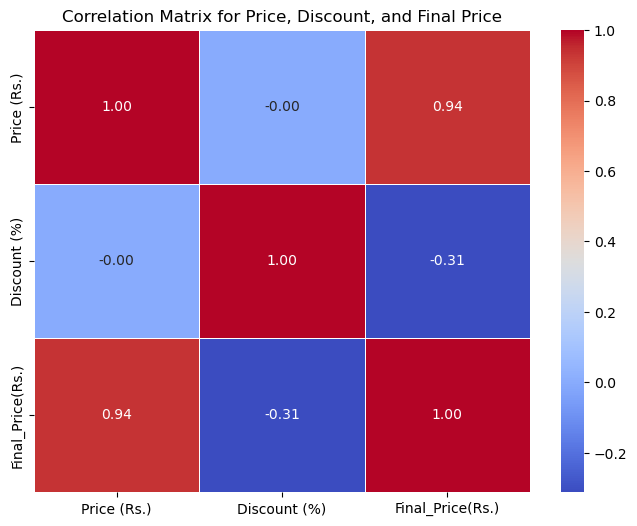

In [39]:
# Step 5: Correlation Matrix
corr = df[['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Price, Discount, and Final Price')
plt.show()

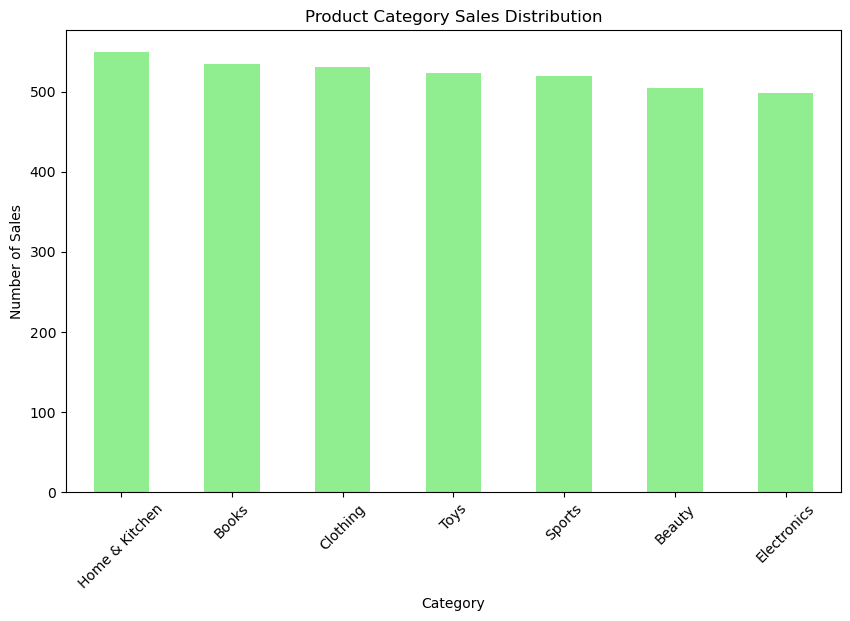

In [41]:
# Step 6: Product Category Sales Distribution (Bar Plot)
category_sales = df.groupby('Category').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='lightgreen')
plt.title('Product Category Sales Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

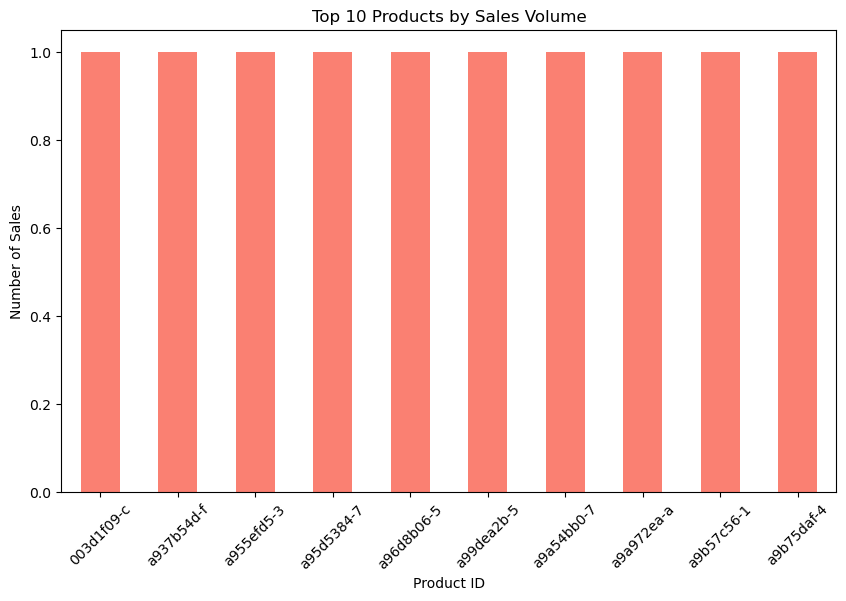

In [43]:
# Step 7: Top 10 Products by Sales Volume
top_products = df.groupby('Product_ID').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='salmon')
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Product ID')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

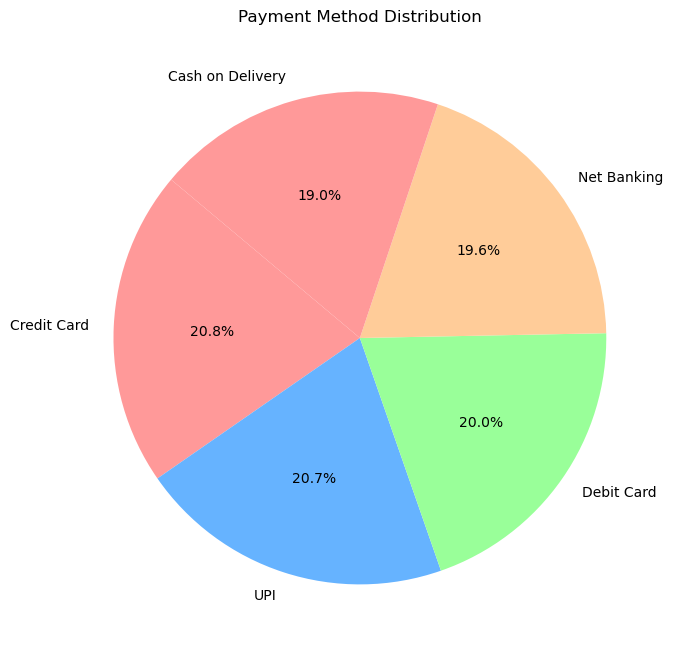

In [45]:
payment_method_dist = df['Payment_Method'].value_counts()

plt.figure(figsize=(8, 8))
payment_method_dist.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=140)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

In [47]:
# First, let's encode categorical variables
df_encoded = df.copy()

# Encode 'Payment_Method' using One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=['Payment_Method'], drop_first=True)

# Prepare features (X) and target (y)
X = df_encoded[['Price (Rs.)', 'Discount (%)'] + [col for col in df_encoded.columns if 'Payment_Method' in col]]
y = df_encoded['Final_Price(Rs.)']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on Test Set
y_pred = lr_model.predict(X_test)

# Evaluate Model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 512.4880548141573
R2 Score: 0.9647690090099461


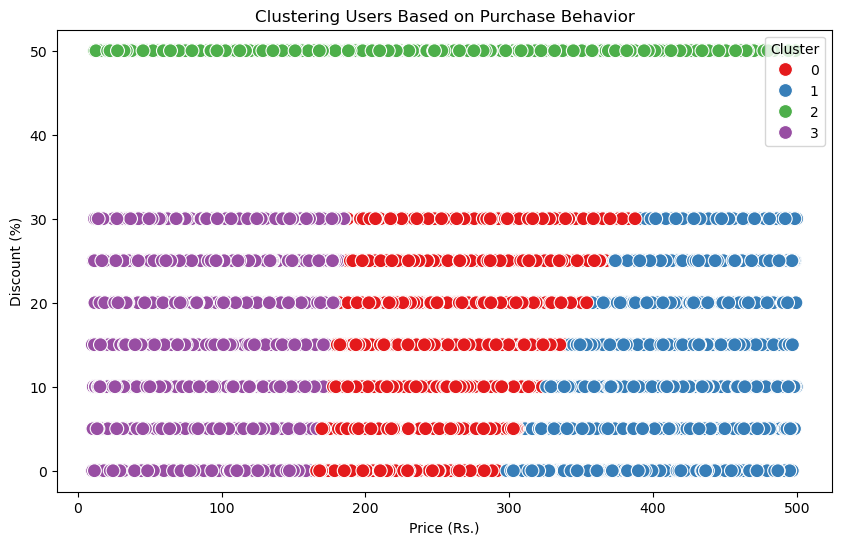

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_features = df[['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']]

# Standardizing the features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_features_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price (Rs.)', y='Discount (%)', hue='Cluster', data=df, palette='Set1', s=100)
plt.title('Clustering Users Based on Purchase Behavior')
plt.xlabel('Price (Rs.)')
plt.ylabel('Discount (%)')
plt.legend(title='Cluster')
plt.show()


In [51]:
from sklearn.linear_model import Ridge

# Train a Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # You can try different alpha values
ridge_model.fit(X_train, y_train)

# Predict on Test Set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - R2 Score: {r2_ridge}')

Ridge Regression - Mean Squared Error: 512.4888310360913
Ridge Regression - R2 Score: 0.9647689556485698


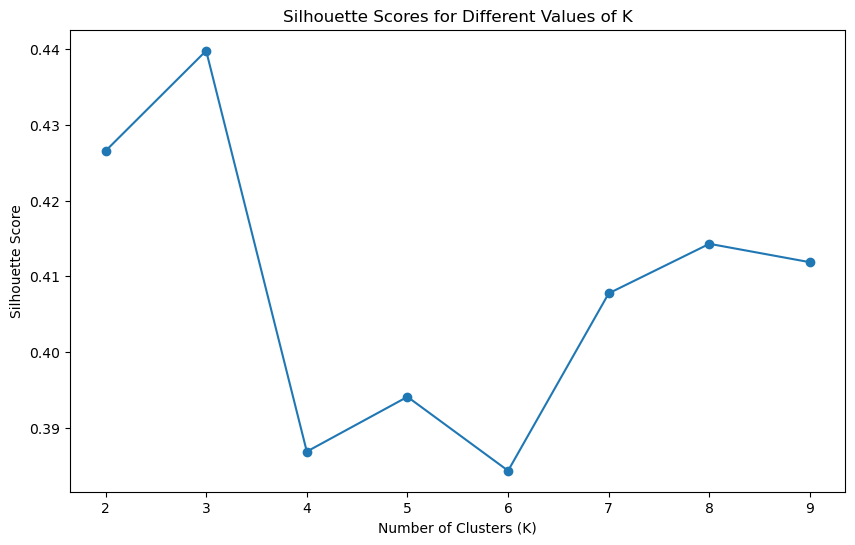

In [55]:
# Step 13: Hyperparameter Tuning for K-Means Clustering

from sklearn.metrics import silhouette_score

# Testing different values of K (number of clusters)
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features_scaled)
    silhouette_scores.append(silhouette_score(clustering_features_scaled, kmeans.labels_))

# Plot silhouette scores to choose the optimal k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [57]:
# Get the average 'Final_Price(Rs.)' for each cluster
cluster_insights = df.groupby('Cluster').agg({
    'Price (Rs.)': 'mean',
    'Discount (%)': 'mean',
    'Final_Price(Rs.)': 'mean'
}).reset_index()

print(cluster_insights)

   Cluster  Price (Rs.)  Discount (%)  Final_Price(Rs.)
0        0   259.684963     16.086556        215.990801
1        1   415.672980     12.502365        362.147682
2        2   257.016884     50.000000        128.508651
3        3    92.611776     15.377185         77.887075


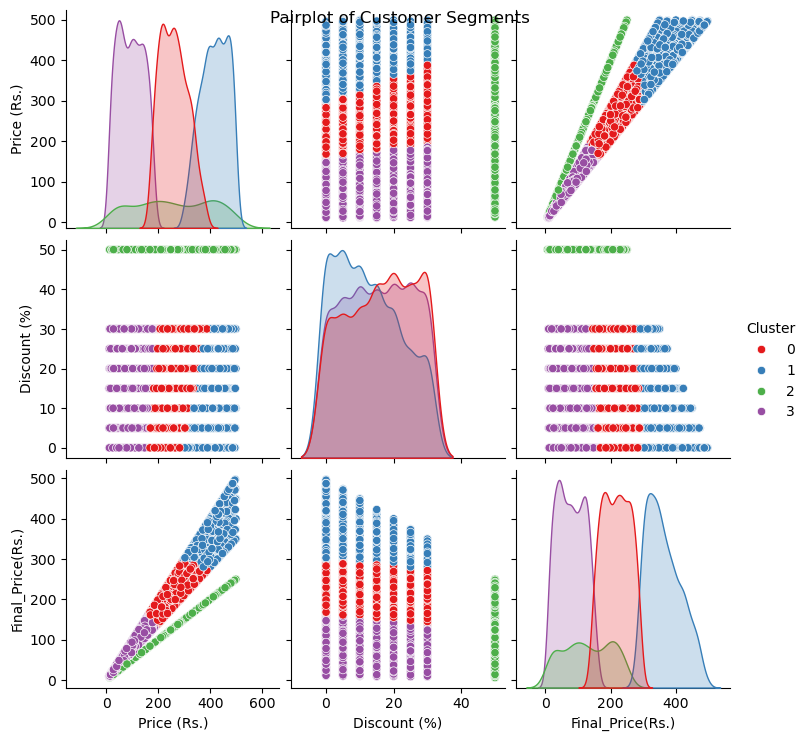

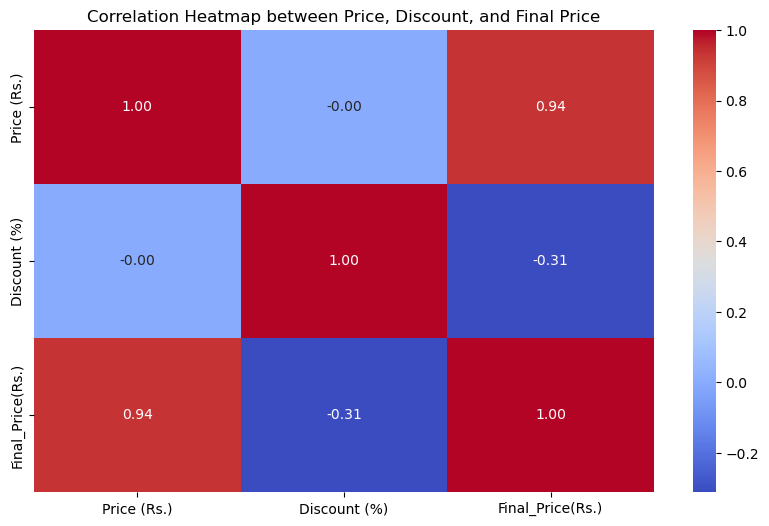

In [59]:
import seaborn as sns

# Pairplot to visualize relationships between features and clusters
sns.pairplot(df[['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)', 'Cluster']], hue='Cluster', palette='Set1')
plt.suptitle('Pairplot of Customer Segments')
plt.show()

# Alternatively, you can create a heatmap for correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Price, Discount, and Final Price')
plt.show()